# Diabetes Risk Prediction

## Introduction
This project is intended to predict the risk of diabetes in patients provided different health attributes.

The dataset used here is downloaded from UCI Machine Learning Repository. It containes 16 independant features and a dependant feature. The problem statement is to predict whether the patient has the risk of diabetes provided his/her health condition.

## Table of Contents
- Importing Libraries and Dataset
- Exploratory Data Analysis
    - Univariate Analysis
    - Bivariate Analysis
- Hypothesis Testing
- Feature Transformation
- Predictive Modelling
    - Baseline Model
    - Voting Classifier
    - Bagging 
    - Boosting
        - AdaBoost Classifier
        - Gradient Boosting Classifier

## Importing Libraries and Dataset

In [110]:
%pip install seaborn
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')



import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')



Note: you may need to restart the kernel to use updated packages.


In [111]:
df = pd.read_csv('diabetes_data_upload.csv')
original = df.copy()

In [112]:
df.shape

(520, 17)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [114]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [115]:
df.describe(include = 'O').T

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


In [116]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Exploratory Data Analysis

### Univariate Analysis

In [117]:
df['class'].value_counts(normalize = True).reset_index()

,class,proportion
0,Positive,0.615385
1,Negative,0.384615


In [118]:
cat_cols = df.select_dtypes('O').columns.tolist()
len(cat_cols)

16

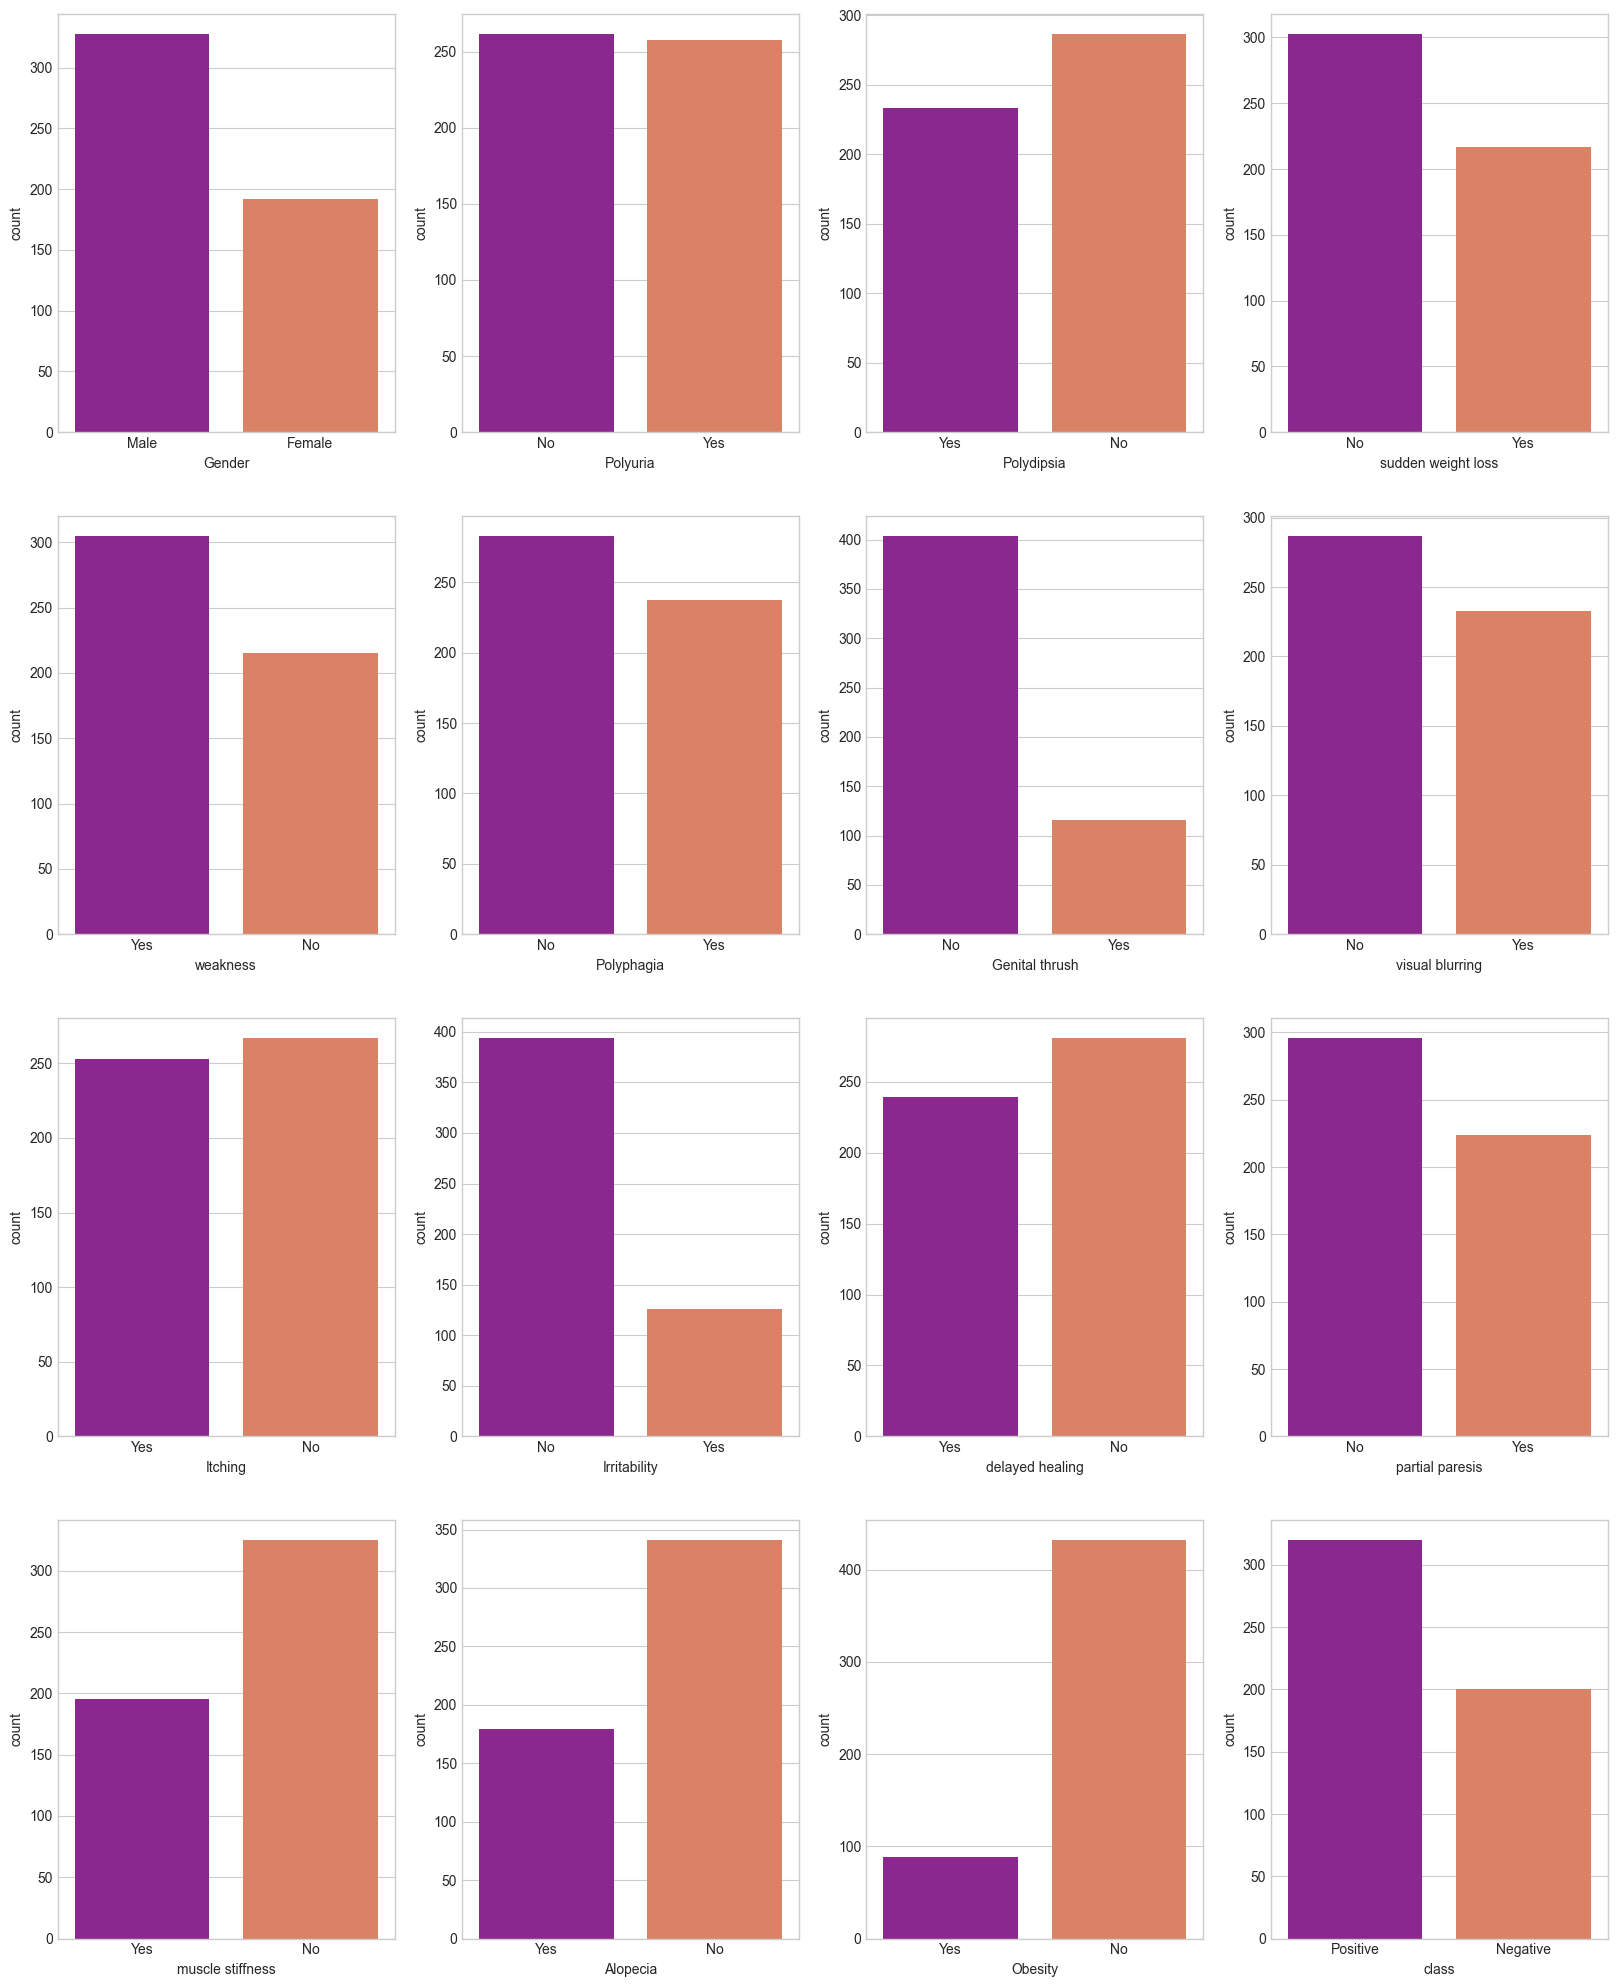

In [119]:
fig, ax = plt.subplots(4, 4, figsize = (20, 25))

for idx, val in enumerate(cat_cols):
    row, col = idx//4, idx%4
    sns.countplot(x = val, data = df, palette = 'plasma', ax = ax[row, col])

### Bivariate Analysis

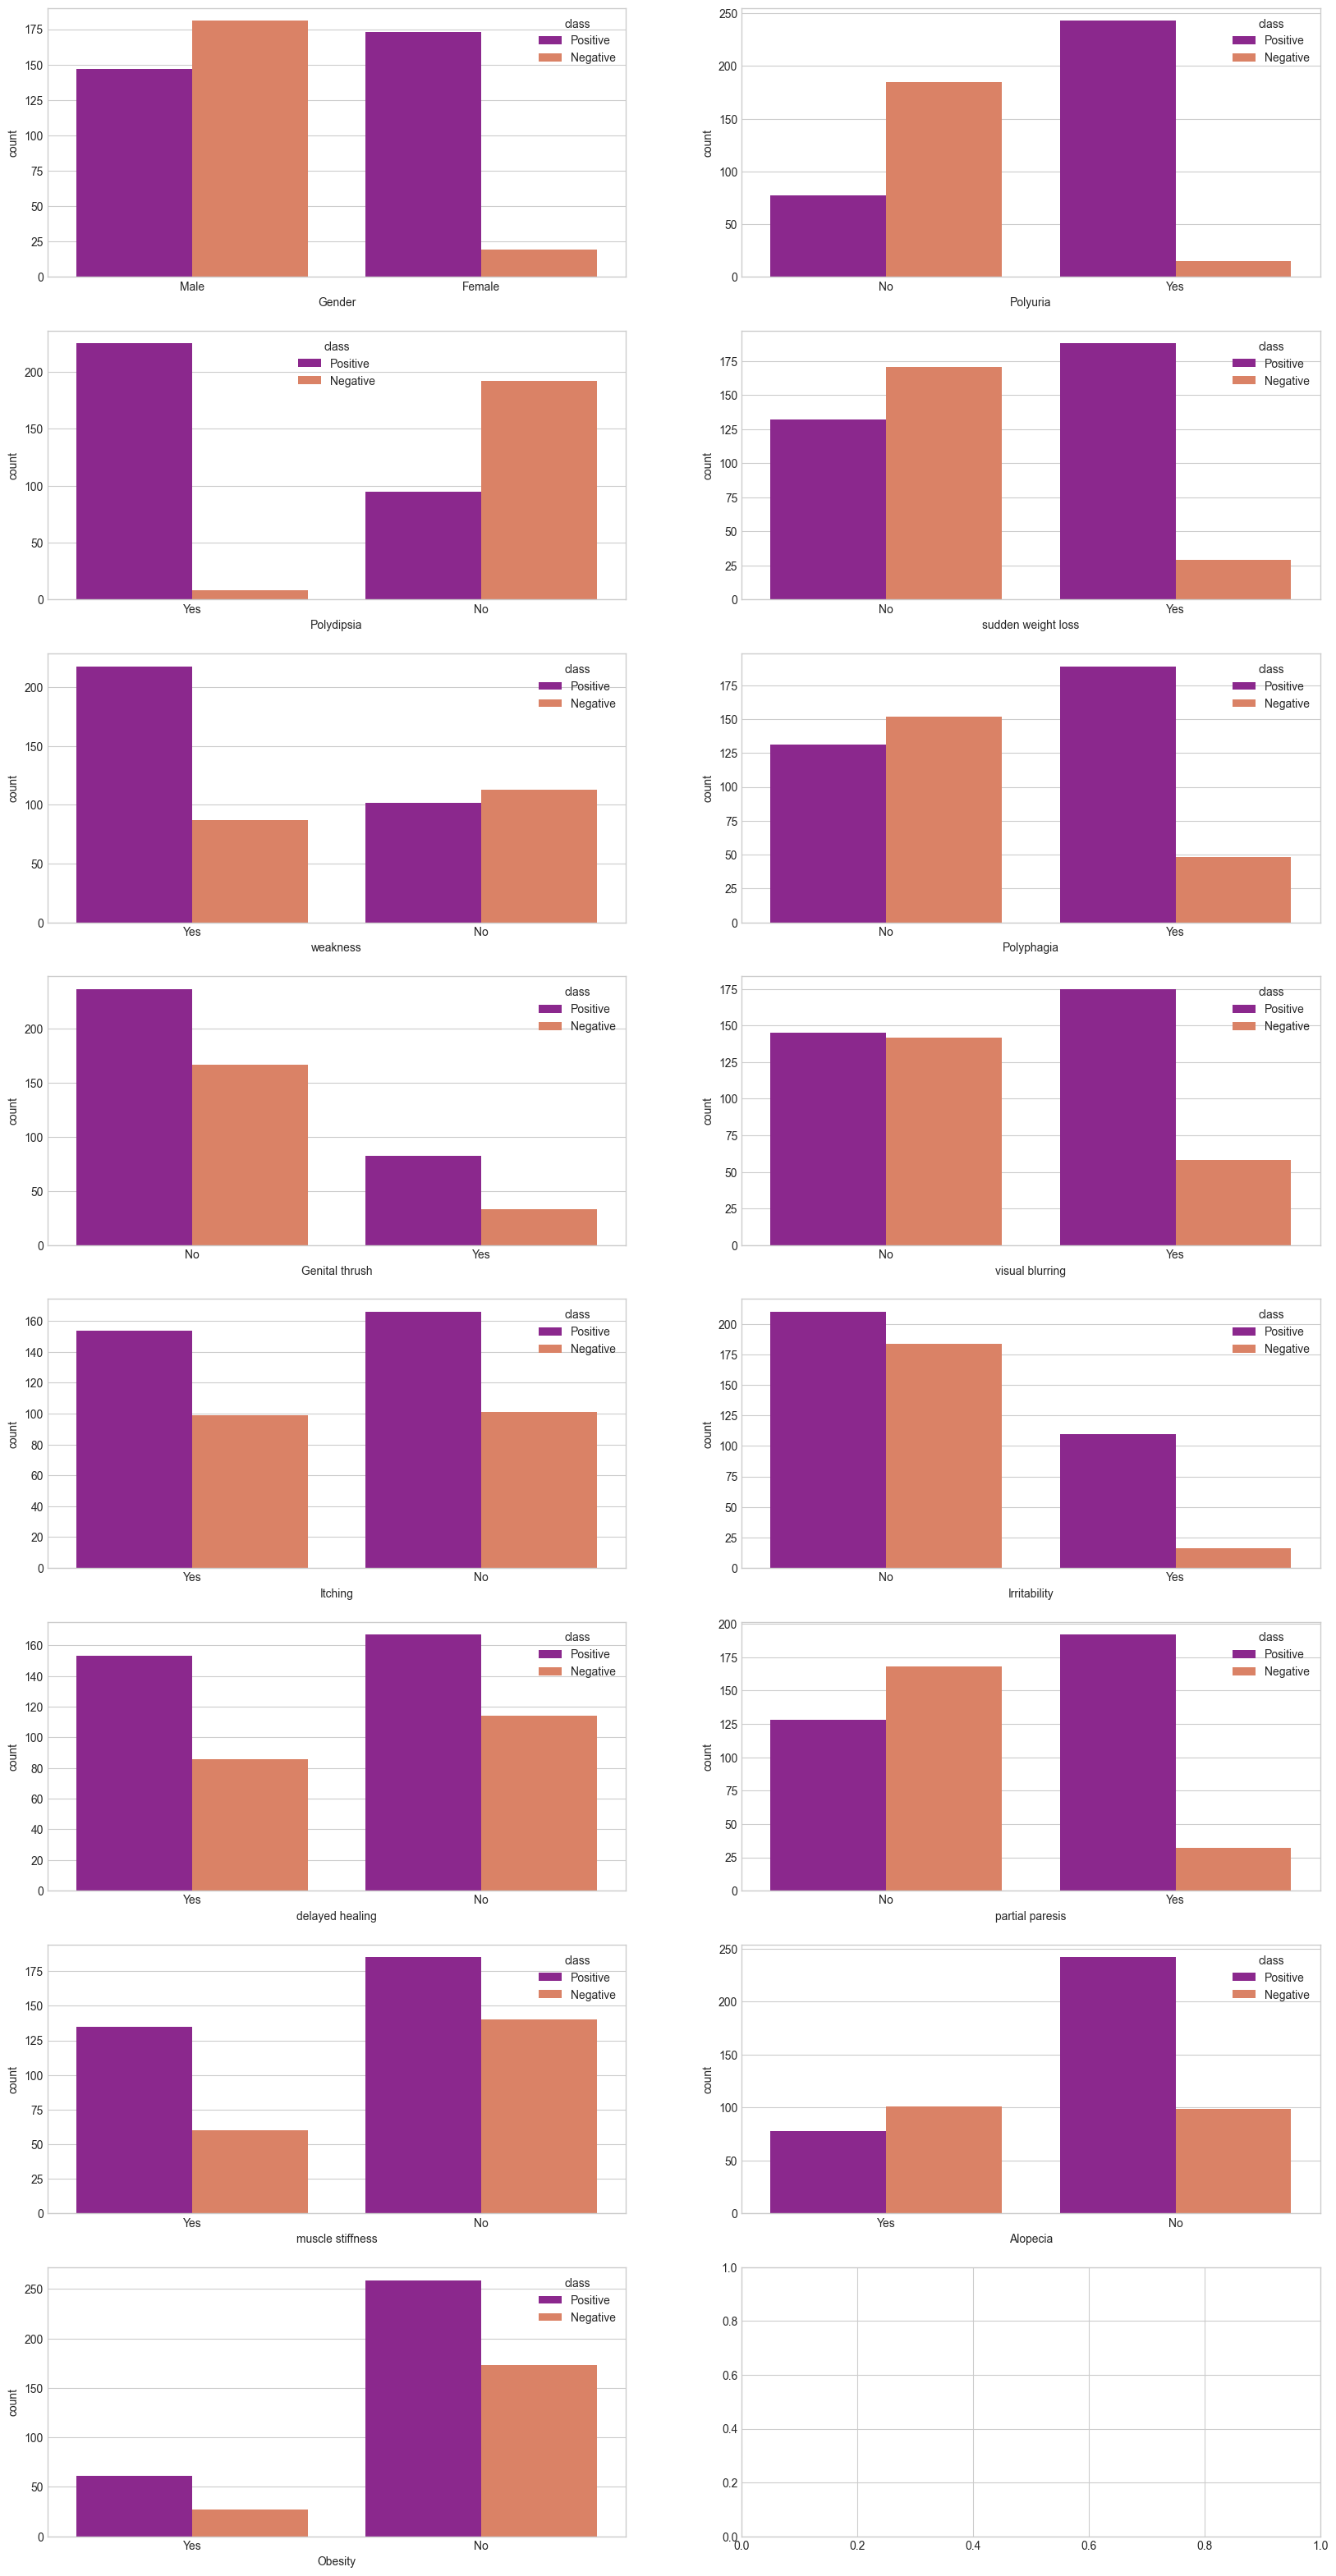

In [120]:
fig, ax = plt.subplots(8, 2, figsize = (20, 40))

for idx, val in enumerate(cat_cols[:-1]):
    row, col = idx//2, idx%2
    sns.countplot(x = val, data = df, hue = 'class', palette = 'plasma', ax = ax[row, col])

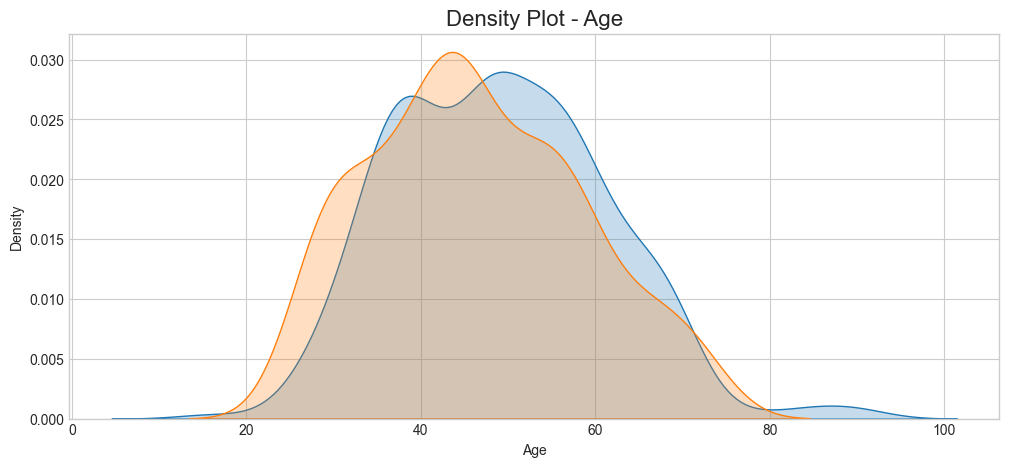

In [121]:
fig, ax = plt.subplots(figsize = (12, 5))

sns.kdeplot(df.loc[df['class'] == 'Positive', 'Age'], shade = True, label = 'Positive')
sns.kdeplot(df.loc[df['class'] == 'Negative', 'Age'], shade = True, label = 'Negative')

plt.title('Density Plot - Age', fontsize = 16)
plt.show()

In [122]:
df.groupby('class')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Negative,200.0,46.360000,12.080983,26.0,37.0,45.0,55.0,72.0
Positive,320.0,49.071875,12.097481,16.0,39.0,48.0,57.0,90.0


## Hypothesis Testing

- H0 : Age has no relation with the risk of diabetes
- H1 : Age is related with the risk of diabetes

In [123]:
age_pos = df.loc[df['class'] == 'Positive', 'Age']
age_neg = df.loc[df['class'] == 'Negative', 'Age']

In [124]:
age_pos = age_pos.sample(200)

In [125]:
print(age_pos.shape)
print(age_neg.shape)

(200,)
(200,)


### Assumptions for T-Test
- Variance should be equal in both the groups
- Residuals should be normally distributed

### Levene's Test - To check the variance equality

In [126]:
stats.levene(age_pos, age_neg)

LeveneResult(statistic=np.float64(0.4961591149314635), pvalue=np.float64(0.48160459633606423))

### To check whether the residuals are normally distributed

In [127]:
diff = np.array(age_pos) - np.array(age_neg)
diff

array([ 15,  21,  26,  -6,   8, -42, -13,  12,  -1,  12,  11,  -5, -15,
       -19,   5, -10, -13, -36,   9,  16,   5,   4,  -5,  10, -28,  29,
         1,  23,   3,  -2,   4,  34, -18,  -1,  -5,  32, -30, -25, -14,
        38,  17, -17, -13,  -2,  -7,  18,  12, -15,  14,  21,  -4,  22,
       -19,   1,  15,  10,  26,  -1, -12,   3, -13, -24,   9,  40,  13,
        15,  -5,  31,   9, -30, -18,   1,  28,   0,   3,  34,  30,  -5,
       -11,  32, -17,  11,   2, -30,   7,  14,   1, -22,   5,  -7,  11,
        16,  17, -14,   8,  12,  -1, -16,  -1, -10,   7, -15, -10,  -2,
        -2,  14,  30,   1,  25,  -9,   2,  -1, -15,  17,  35,  13,  24,
       -18, -37,   7,   8,   0,   6,  15,  -6,   0,  19, -23,  19, -23,
         1,   2, -12, -19,  24, -18,  -8, -10,  16,   2,  -8, -18, -17,
        -1,  -8,   3,  -2, -11,   9, -11,   0,   6, -12,  15,  -8, -29,
         5,  21,  25,  25,  14,   8,   0,   8, -24,   2,  31,  10,  12,
        10,   1,  18,  10, -18,  27,  13,  37,   2, -14,  -9,  1

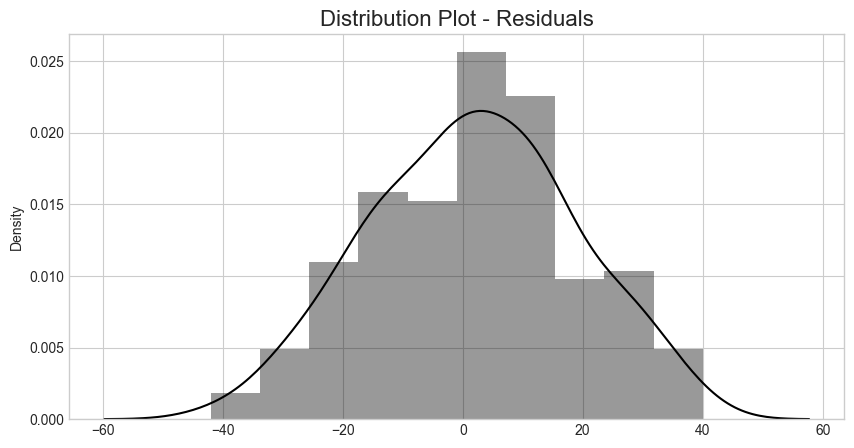

In [128]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.distplot(diff, color = 'k')

plt.title('Distribution Plot - Residuals', fontsize = 16)
plt.show()

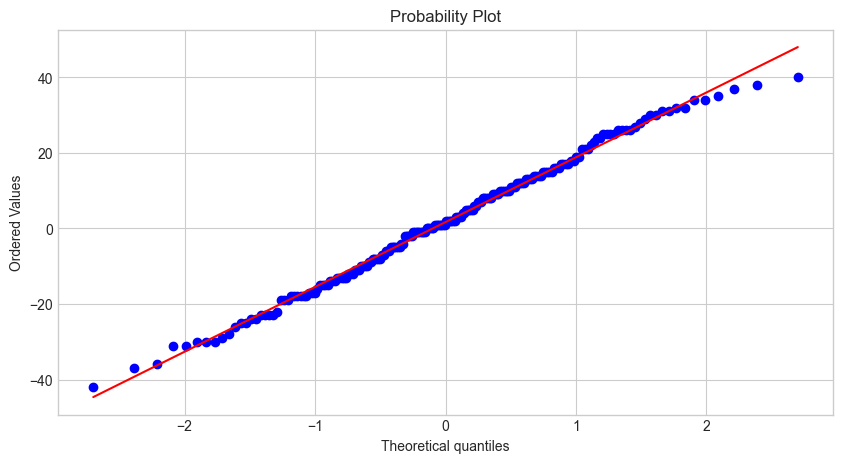

In [129]:
fig, ax = plt.subplots(figsize = (10, 5))

stats.probplot(diff,plot = plt, dist = 'norm')
plt.show()

In [130]:
stats.shapiro(diff)

ShapiroResult(statistic=np.float64(0.9930454120320037), pvalue=np.float64(0.4662264600378461))

In [131]:
stats.ttest_ind(age_pos, age_neg)

TtestResult(statistic=np.float64(1.377579226707023), pvalue=np.float64(0.16910737013531849), df=np.float64(398.0))

The independant T-Testing confirms that the difference in mean age between positive and negative classes is significant. The null hypothesis which says the age has no relation with the diabetes risk can be rejected.

## Feature Transformation

In [132]:
for col in cat_cols[1:-1]:
    df[col] = df[col].replace({'Yes' : 1, 'No' : 0})

In [133]:
df.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
148,44,Male,0,1,0,0,0,1,0,0,0,1,0,0,0,1,Positive
89,35,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Positive
128,32,Male,0,1,0,1,1,1,0,1,1,0,0,0,1,0,Positive
223,55,Male,0,0,0,1,1,0,1,1,0,1,0,1,0,1,Negative
406,56,Male,0,0,1,1,1,0,1,1,0,1,0,1,1,0,Negative
403,53,Male,0,0,0,1,0,0,1,1,0,1,0,1,1,0,Negative
183,39,Female,1,1,0,0,1,1,1,1,0,1,1,0,0,0,Positive
110,53,Female,0,0,1,1,0,0,1,1,0,1,0,0,0,0,Positive
296,48,Female,1,1,1,1,1,0,0,0,0,0,1,0,0,0,Positive
136,54,Male,0,0,0,0,0,1,0,1,1,0,0,1,1,1,Positive


In [134]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first = True)

In [135]:
df.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive,True
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive,True
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive,True
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive,True
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive,True


In [136]:
df['class'].replace({'Positive' : 1, 'Negative' : 0}, inplace = True)

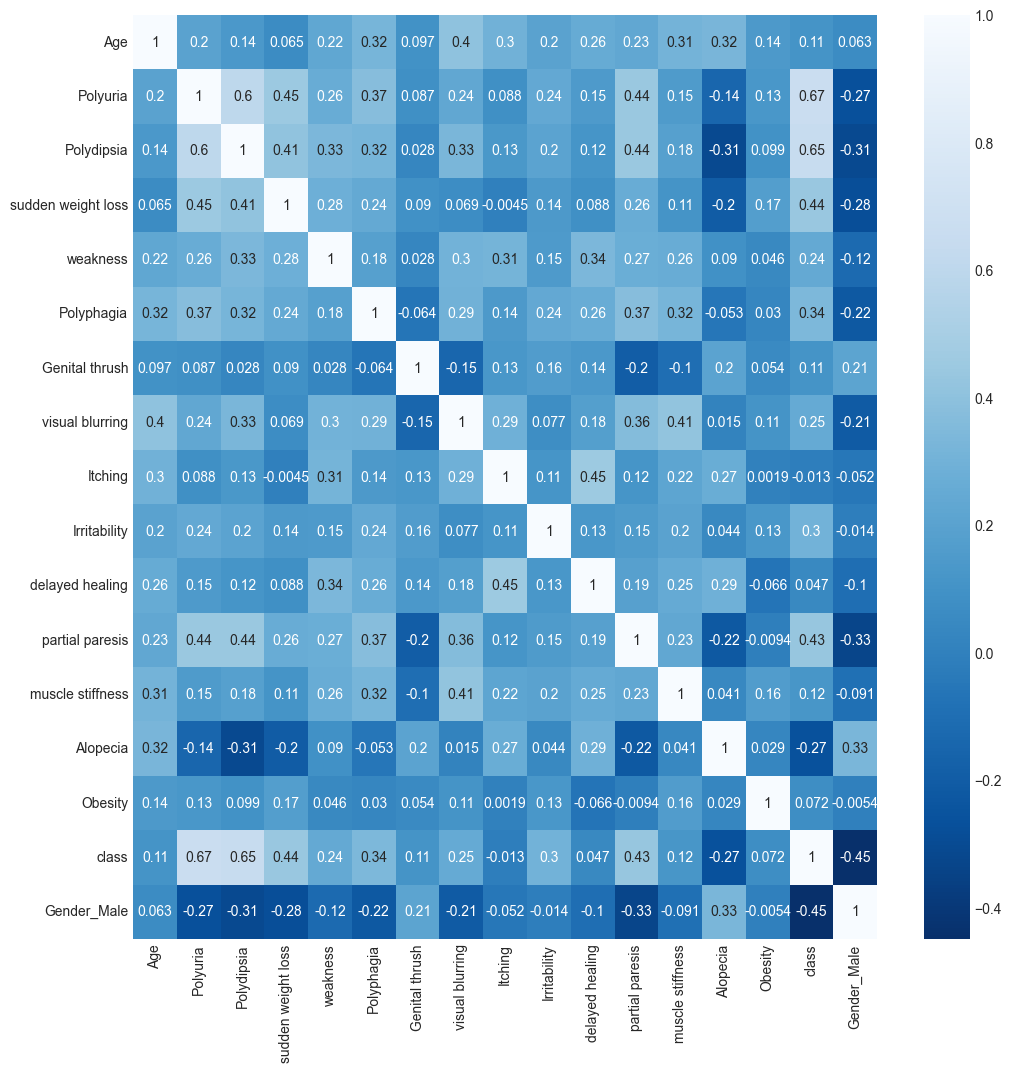

In [137]:
fig, ax = plt.subplots(figsize = (12, 12))

sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')
plt.show()

In [138]:
df.corr()['class'].sort_values(ascending = False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender_Male          -0.449233
Name: class, dtype: float64

In [139]:
selected_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis', 'Gender_Male',
                 'class']

In [140]:
df_sel = df[selected_cols]

## Predictive Modelling

### Baseline Model

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [142]:
X = df_sel.drop('class', axis = 1)
y = df_sel['class']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                   random_state = 42)

In [144]:
lr = LogisticRegression(solver = 'liblinear')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
sv = SVC(kernel = 'linear')

In [145]:
acc = pd.DataFrame()
algorithm = []
training = []
testing = []
f1 = []

for i in [lr, dt, rf, knn, nb, sv]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algorithm.append(i)
    training.append(model.score(X_train, y_train))
    testing.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

In [146]:
acc['Model'] = algorithm
acc['Training Score'] = training
acc['Testing Score'] = testing
acc['F1 Score'] = f1

In [147]:
acc

,Model,Training Score,Testing Score,F1 Score
0,LogisticRegression(solver='liblinear'),0.887019,0.884615,0.906250
1,DecisionTreeClassifier(),0.894231,0.923077,0.935484
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.894231,0.923077,0.935484
3,KNeighborsClassifier(),0.894231,0.961538,0.968750
4,GaussianNB(),0.894231,0.961538,0.968750
5,SVC(kernel='linear'),0.887019,0.923077,0.939394


### Voting Classifier

The models which have given out best accuracy and F1 scores are used in Voting Classifier as base estimators. The output from all the four models will be combined (based on majority) to give out the final output.

In [148]:
classifiers = [('NB', nb), ('KNN', knn), ('SVC', sv), ('DT', dt)]

In [149]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = classifiers)

In [150]:
vc

VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVC', SVC(kernel='linear')),
                             ('DT', DecisionTreeClassifier())])

In [151]:
vc_class = vc.fit(X_train, y_train)
y_pred = vc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


The accuracy and F1 score are good, but not higher than the baseline model. We'll try bagging techniques in further steps.

### Bagging Classifier

In [152]:
from sklearn.ensemble import BaggingClassifier

In [153]:
bc = BaggingClassifier(n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 56)

In [154]:
bc_class = bc.fit(X_train, y_train)
y_pred = bc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


Bagging Classifier gives the best accuracy and F1 score. Let's also check out the Out-Of-Bag score since we are using oob observations as the validation set.

In [155]:
bc.oob_score_

0.875

In [156]:
for i in range(100, 500, 100):
    bc = BaggingClassifier(n_estimators = i, max_features = 0.8, n_jobs = -1, random_state = 56)
    bc_class = bc.fit(X_train, y_train)
    y_pred = bc_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 200
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 300
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 400
Accuracy : 0.9615384615384616
F1-Score : 0.96875


In [157]:
confusion_matrix(y_test, y_pred)

array([[38,  2],
       [ 2, 62]])

### Boosting

Boosting techniques focus on giving more weightage to the misclassified entries from the previous tree in the model. Two techniques are tried out here,
- AdaBoost
- GradientBoosting

#### AdaBoost Classifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [159]:
abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 60)

In [160]:
abc_class = abc.fit(X_train, y_train)
y_pred = abc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9230769230769231
0.9393939393939394


In [161]:
for i in range(100, 600, 100):
    abc = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 4),
                             n_estimators = i, learning_rate = 0.1, random_state = 60)
    abc_class = abc.fit(X_train, y_train)
    y_pred = abc_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 200
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 300
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 400
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 500
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419


#### Gradient Boosting Classifier

In [162]:
gbm = GradientBoostingClassifier(n_estimators = 200, subsample = 0.8, random_state = 62)

In [163]:
gbm_class = gbm.fit(X_train, y_train)
y_pred = gbm_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


In [164]:
for i in range(100, 600, 100):
    gbm = GradientBoostingClassifier(n_estimators = i, subsample = 0.8, random_state = 62)
    gbm_class = gbm.fit(X_train, y_train)
    y_pred = gbm_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 200
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 300
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 400
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 500
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419


The Gradient Boosting Classifier gives the best accuracy and F1 score of ~97%. This model correctly classifies 100 observations and misclassifies only 4 of them, as confirmed in the confusion matrix above.

In [165]:
# Save the model using pickle
import pickle

# Assuming 'gbm' is your best model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(gbm, file)
